# Project 2 - Billboard hits data munging
## 1. Exploring the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

billboard_df = pd.read_csv('../assets/billboard.csv')

pd.set_option('display.max_columns', billboard_df.shape[0])

#Explore the table's size, headers and data types
billboard_df.head()
billboard_df.tail()
billboard_df.shape
billboard_df.dtypes

#Display basic stats about the numerical columns
billboard_df.describe()
billboard_df.max()
billboard_df.min()

#Get a list of all the genres included in the table
billboard_df['genre'].value_counts(normalize=False, sort=True, ascending=False)

#Number of charts that left the top after one week
billboard_df['x1st.week'].count() - billboard_df['x2nd.week'].count()

#Average number of weeks that songs stayed in the top
weeks_number = []
for i in range(billboard_df.shape[0]):
    week = 0
    for j in range(7, billboard_df.shape[1]):
        if ~np.isnan(billboard_df.loc[i, billboard_df.columns[j]]):
            week += 1
    weeks_number.append(week)
    
avg_weeks_number = sum(weeks_number) / len(weeks_number)
print 'Songs stayed {} weeks on average in the top.'.format(avg_weeks_number)

#Get song that stayed longest in the top
song_longest_name = billboard_df.loc[weeks_number.index(max(weeks_number)),'track'] 
song_longest_artist = billboard_df.loc[weeks_number.index(max(weeks_number)),'artist.inverted']
print 'The song {} from {} was in the top the longest. It was in it for {} weeks.'.format(song_longest_name,
                                                                                         song_longest_artist,
                                                                                         max(weeks_number))
billboard_df['Weeks_in_the_top'] = pd.Series(weeks_number)
billboard_df.head()

Songs stayed 16.7413249211 weeks on average in the top.
The song Higher from Creed was in the top the longest. It was in it for 57 weeks.


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,Weeks_in_the_top
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


__ Dataset description __  
This dataset contains all the charts that have been included in the top 100 in year 2000, including their details, the dates at which they enterered the top and peaked, as well as their positions in the top week after week since the entered it.  

__ Rankings observations __  
317 songs were in the top 100 in year 2000. Four songs only stayed for a week. Some songs left the top and rentered it at a later date. The song 'Higher' from Creed was in the top for 57 weeks in total, which is the longest. On average songs stayed less than 17 weeks in the top.

__ Genres observations __  
The top 100 contained 10 different genres and the most frequent ones are Rock, Country, Rap and R&B.

## 2. Clean the data

In [8]:
#Drop empty columns at the end
bb_clean = billboard_df.drop(['x66th.week', 'x67th.week', 'x68th.week', 'x69th.week', 'x70th.week', 'x71st.week', 'x72nd.week', 'x73rd.week', 'x74th.week', 'x75th.week', 'x76th.week'], axis=1)

#Define date columns ad datetime type
bb_clean['date.entered'] = bb_clean['date.entered'].astype('datetime64')
bb_clean['date.peaked'] = bb_clean['date.peaked'].astype('datetime64')

#Define time columns as timedelta type
bb_clean['time'] = '0:' + bb_clean['time']
bb_clean['time'] = pd.to_timedelta(bb_clean['time'])

#Define position columns as integer type (and replace missing values by 0)
#bb_clean.fillna(0, inplace=True)
#bb_clean.loc[:, 'x2nd.week':'x65th.week'] = bb_clean.loc[:, 'x2nd.week':'x65th.week'].astype('int')

#Rename columns
bb_clean = bb_clean.rename(columns = {'artist.inverted': 'artist', 'date.entered': 'date_entered', 'date.peaked': 'date_peaked'})

weeks_num = range(1, 66)
suff = ['st', 'nd', 'rd', 'th', 'th', 'th', 'th', 'th', 'th'] + ['th']*10 + ['th', 'st', 'nd', 'rd', 'th', 'th', 'th', 'th', 'th', 'th']*4 + ['th', 'st', 'nd', 'rd', 'th', 'th']
bb_clean = bb_clean.rename(columns = {'x'+ str(i) + j +'.week': 'week' + str(i) for i, j in zip(weeks_num, suff)})

bb_clean.head()

,year,artist,track,time,genre,date_entered,date_peaked,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,week18,week19,week20,week21,week22,week23,week24,week25,week26,week27,week28,week29,week30,week31,week32,week33,week34,week35,week36,week37,week38,week39,week40,week41,week42,week43,week44,week45,week46,week47,week48,week49,week50,week51,week52,week53,week54,week55,week56,week57,week58,week59,week60,week61,week62,week63,week64,week65,Weeks_in_the_top
0,2000,Destiny's Child,Independent Women Part I,00:03:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria",00:04:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,00:04:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
3,2000,Madonna,Music,00:03:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),00:03:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [9]:
# Pivot the weekly ranking data to be long rather than wide
# i.e. remove the 72 'week' columns and replace it with Week and Ranking. 
# There will now be multiple entries for each song, one for each week on the Billboard rankings.

bb_melt = pd.melt(bb_clean, id_vars=['year', 'artist', 'track', 'time', 'genre', 'date_entered', 'date_peaked', 
                                     'Weeks_in_the_top'], var_name='Week', value_name='Ranking')

print bb_melt.shape
bb_melt.head()

(20605, 10)


,year,artist,track,time,genre,date_entered,date_peaked,Weeks_in_the_top,Week,Ranking
0,2000,Destiny's Child,Independent Women Part I,00:03:38,Rock,2000-09-23,2000-11-18,28,week1,78.0
1,2000,Santana,"Maria, Maria",00:04:18,Rock,2000-02-12,2000-04-08,26,week1,15.0
2,2000,Savage Garden,I Knew I Loved You,00:04:07,Rock,1999-10-23,2000-01-29,33,week1,71.0
3,2000,Madonna,Music,00:03:45,Rock,2000-08-12,2000-09-16,24,week1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),00:03:38,Rock,2000-08-05,2000-10-14,21,week1,57.0


## 3. Visualize the data

In [10]:
#(bb_melt.loc[0, 'date_peaked'] - bb_melt.loc[0, 'date_entered'])
bb_clean.to_csv('bb_clean.csv')
bb_melt.to_csv('bb_melt.csv')

<img src="genres.png">

<img src="songs.png">

<img src="songs2.png">

Songs that reached #1 stayed in the top for 30.41 weeks on average


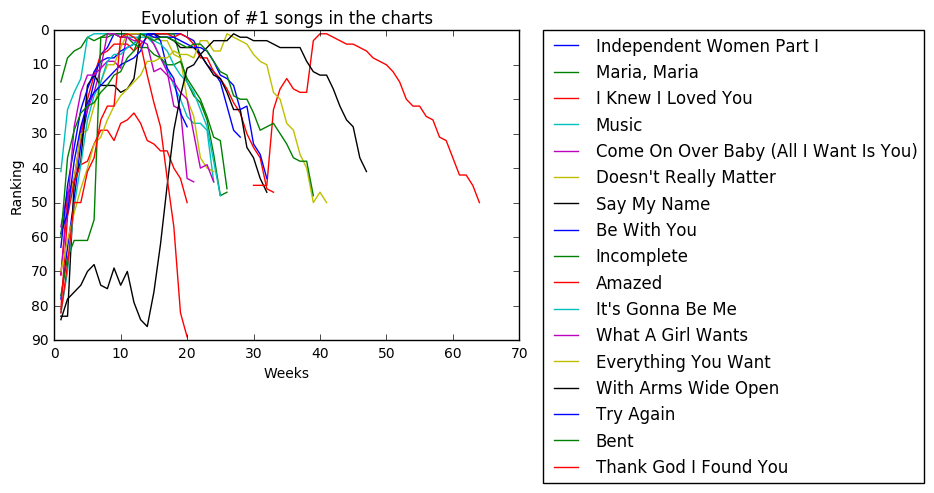

In [11]:
#Dataframe of songs that reached #1
number_1s = bb_melt.loc[(bb_melt['Ranking'] == 1.0), ['artist', 'track', 'Week']]

all_1s = bb_melt.loc[(bb_melt['track'].isin(number_1s['track'])), ['artist', 'track', 'Week', 'Ranking', 'Weeks_in_the_top']]

#Average time that songs that reached #1 stayed in the top
avg_weeks_1s = all_1s.loc[(all_1s['Week'] == 'week1'), ['Weeks_in_the_top']].mean().values
print 'Songs that reached #1 stayed in the top for {} weeks on average'.format(round(avg_weeks_1s, 2))

#Plot time evolution of rankings of songs that reached #1
for i in all_1s['track'].unique():
    plt.plot(range(1,66), all_1s.loc[(all_1s['track'] == i), ['Ranking']], label = i)

plt.xlabel('Weeks')
plt.ylabel('Ranking')
plt.gca().invert_yaxis()
plt.title('Evolution of #1 songs in the charts')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

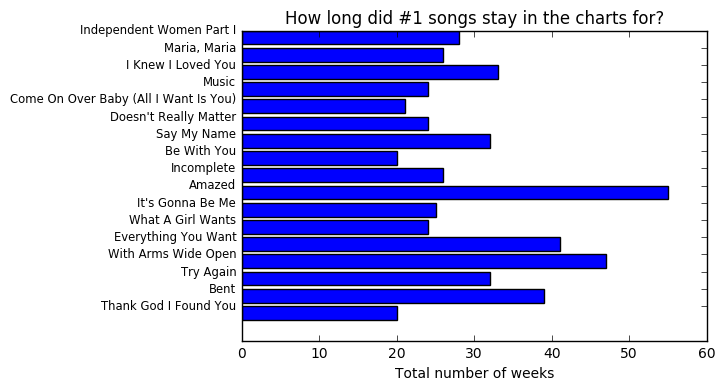

In [12]:
#Plot the total number of weeks that #1 songs stayed in the top
plt.barh(range(17), all_1s['Weeks_in_the_top'][:17])
plt.xlabel('Total number of weeks')
plt.gca().invert_yaxis()
plt.title('How long did #1 songs stay in the charts for?')
plt.yticks(range(17), all_1s['track'][:17], size='small')
plt.show()

## The blog post summarising these findings can be found below

[Top charts 2000](https://chloepont.github.io/top_charts_2000/)